# Third Phase Evaluation Project - Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

    Description of fnlwgt (final weight)
    
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    1.	A single cell estimate of the population 16+ for each state.

    2.	Controls for Hispanic Origin by age and sex.

    3.	Controls by Race, age and sex.
    
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
Df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
Df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
Df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
Df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
for column in Df.columns:
    unique_values = Df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print('\n')

Column: Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Column: Workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column: Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]


Column: Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column: Education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column: Marital_status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Column: Occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales'

<AxesSubplot:>

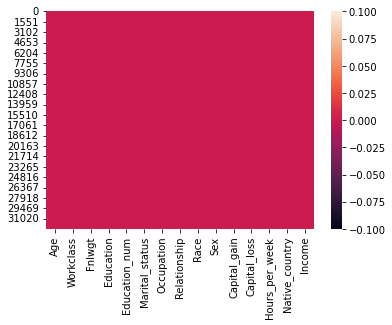

In [6]:
sns.heatmap(Df.isnull())

In [7]:
round((Df.eq(' ?').mean() * 100), 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

In [8]:
Df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
Df[['Workclass', 'Occupation', 'Native_country']].replace([' ?'],['nan'],inplace=True)

In [10]:
Df['Workclass'].fillna(Df['Workclass'].mode()[0], inplace=True)
Df["Occupation"].fillna(Df["Occupation"].mode()[0], inplace=True)
Df["Native_country"].fillna(Df["Native_country"].mode()[0], inplace=True)

In [11]:
Df.fillna(Df.median()[0], inplace=True)

In [12]:
Df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
Df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

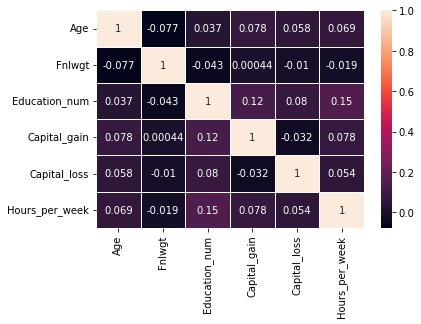

In [14]:
sns.heatmap(Df.corr(), annot=True, linewidth=1)

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

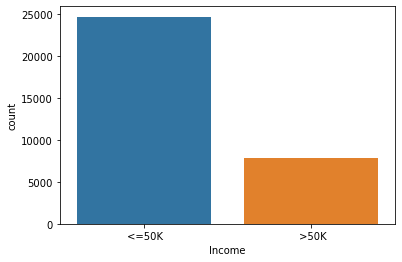

In [15]:
sns.countplot(Df["Income"])
Df.Income.value_counts()

<AxesSubplot:xlabel='Age', ylabel='count'>

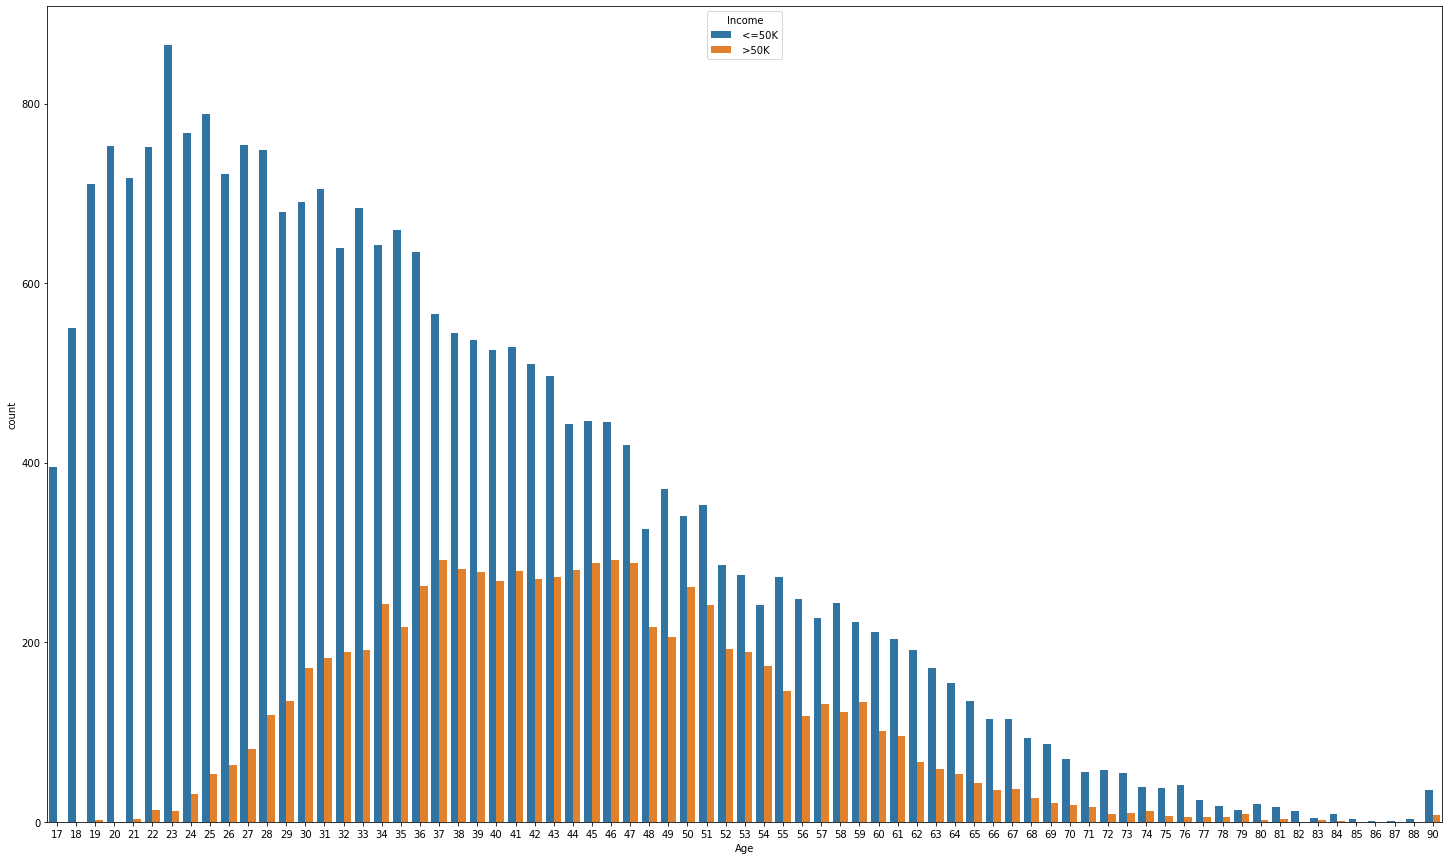

In [16]:
plt.figure(figsize =(25,15))
sns.countplot(x= 'Age', hue= 'Income', data= Df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

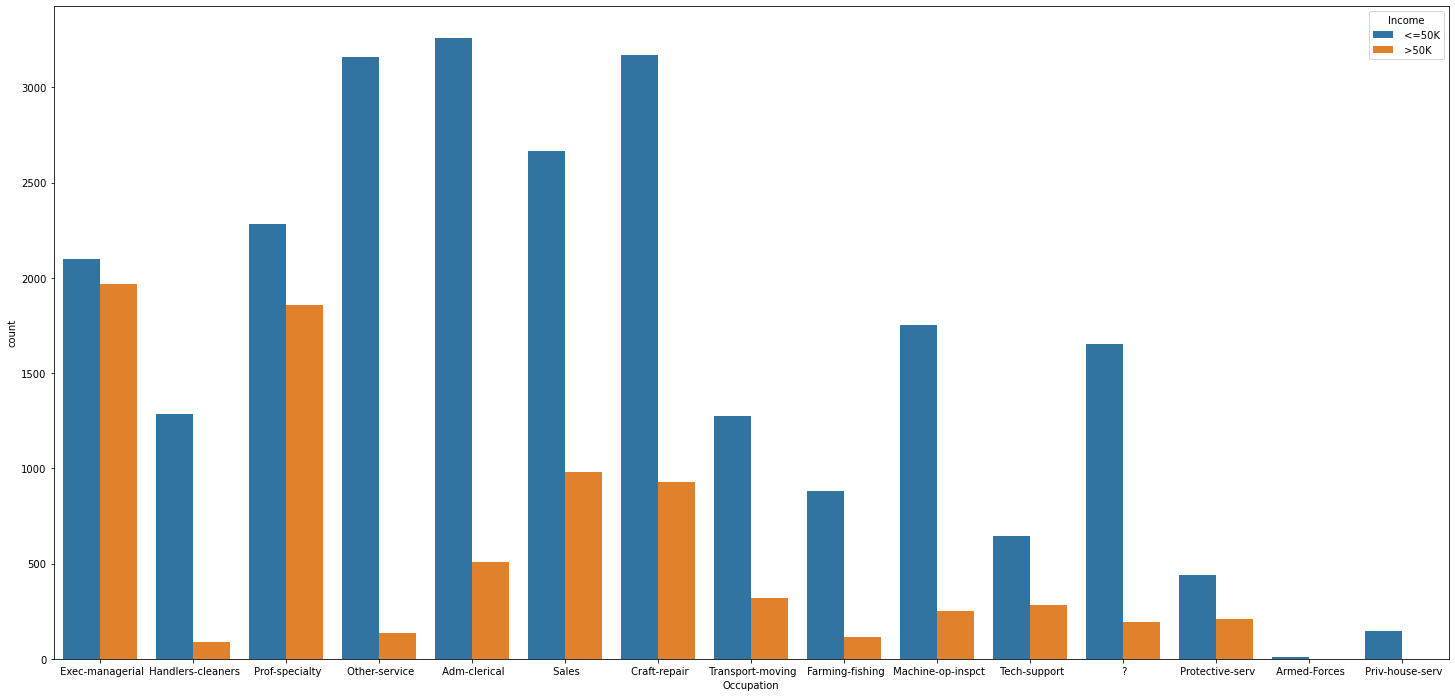

In [17]:
plt.figure(figsize =(25,12))
sns.countplot(x= 'Occupation', hue= 'Income', data= Df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

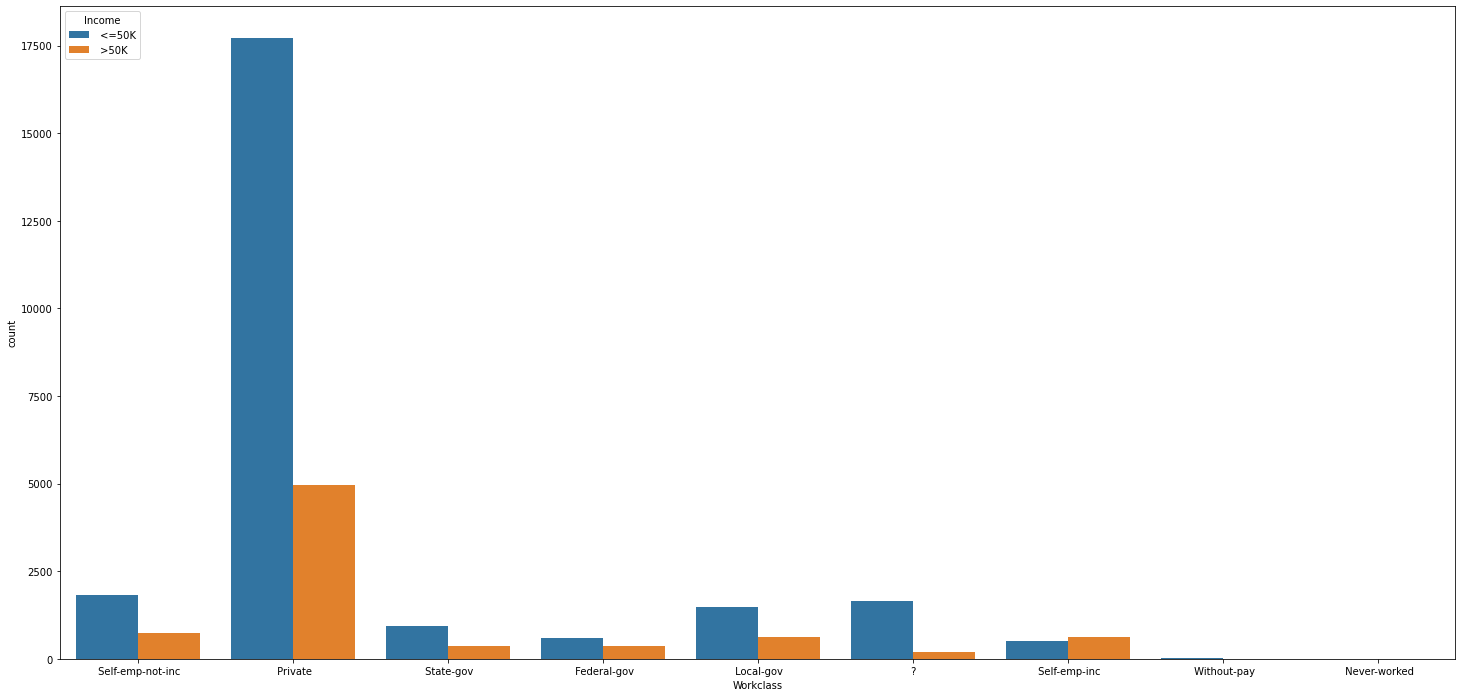

In [18]:
plt.figure(figsize =(25,12))
sns.countplot(x= 'Workclass', hue= 'Income', data= Df)

Here, we can see that people working in other than self-emp-inc are having <=50k and in self-emp-inc people are getting higher than >50k

<AxesSubplot:xlabel='Sex', ylabel='count'>

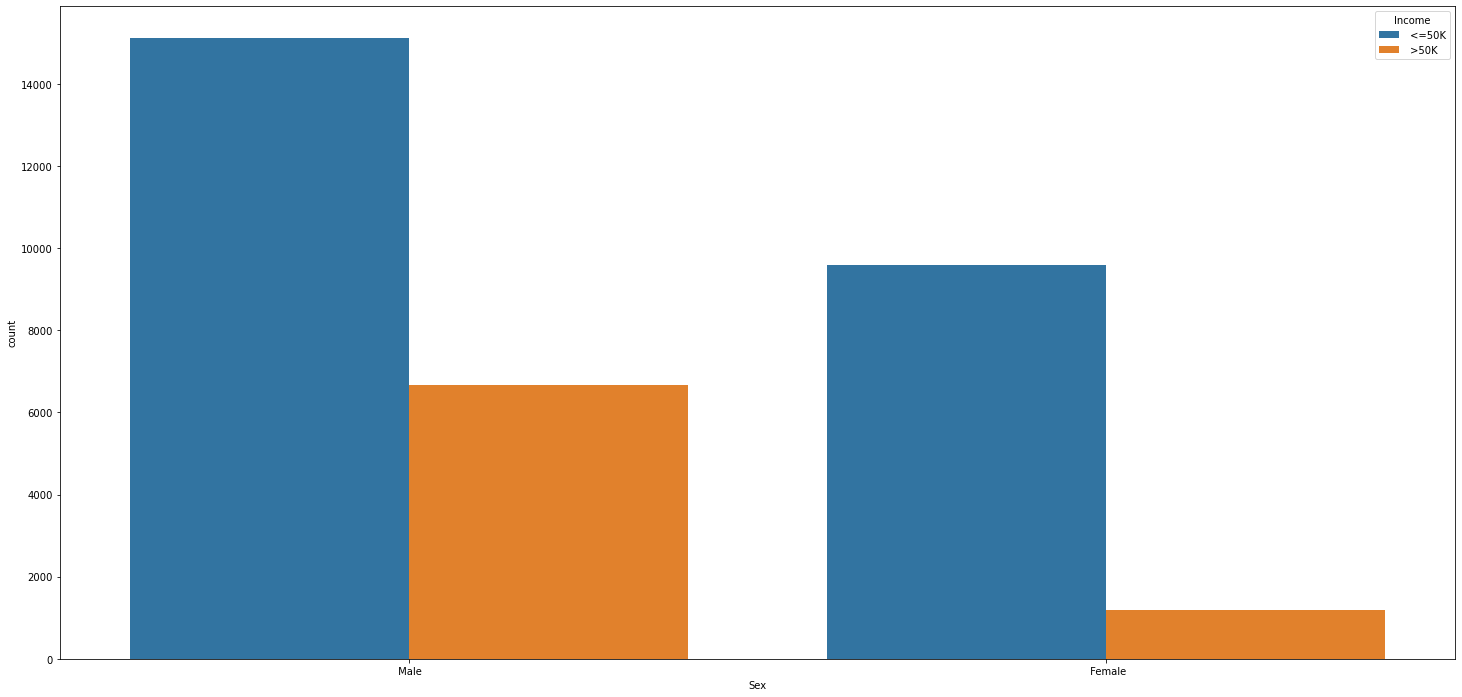

In [19]:
plt.figure(figsize =(25,12))
sns.countplot(x= 'Sex', hue= 'Income', data= Df)

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

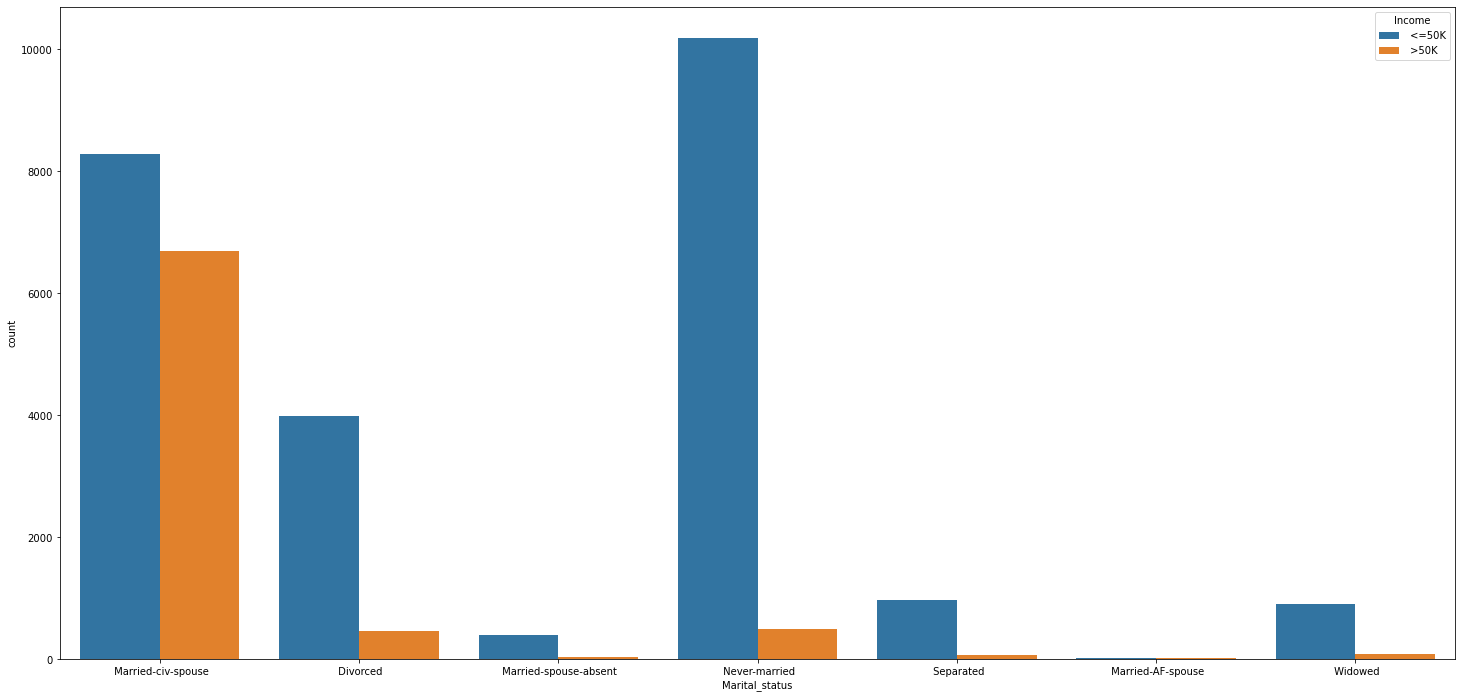

In [20]:
plt.figure(figsize =(25,12))
sns.countplot(x= 'Marital_status', hue= 'Income', data= Df)
Df.Marital_status.value_counts()

As per the observaton, we can see that the income is <=50k is more in all aspects (as mentioned in the above plots) compared to >50k

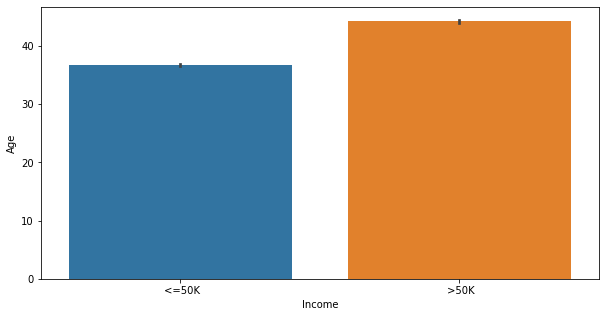

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="Income",y="Age",data=Df)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

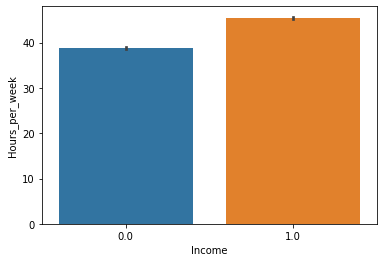

In [25]:
sns.barplot(x="Income",y = "Hours_per_week" , data=Df)

Let's check whether the education impacted on income or not

<AxesSubplot:xlabel='Education', ylabel='count'>

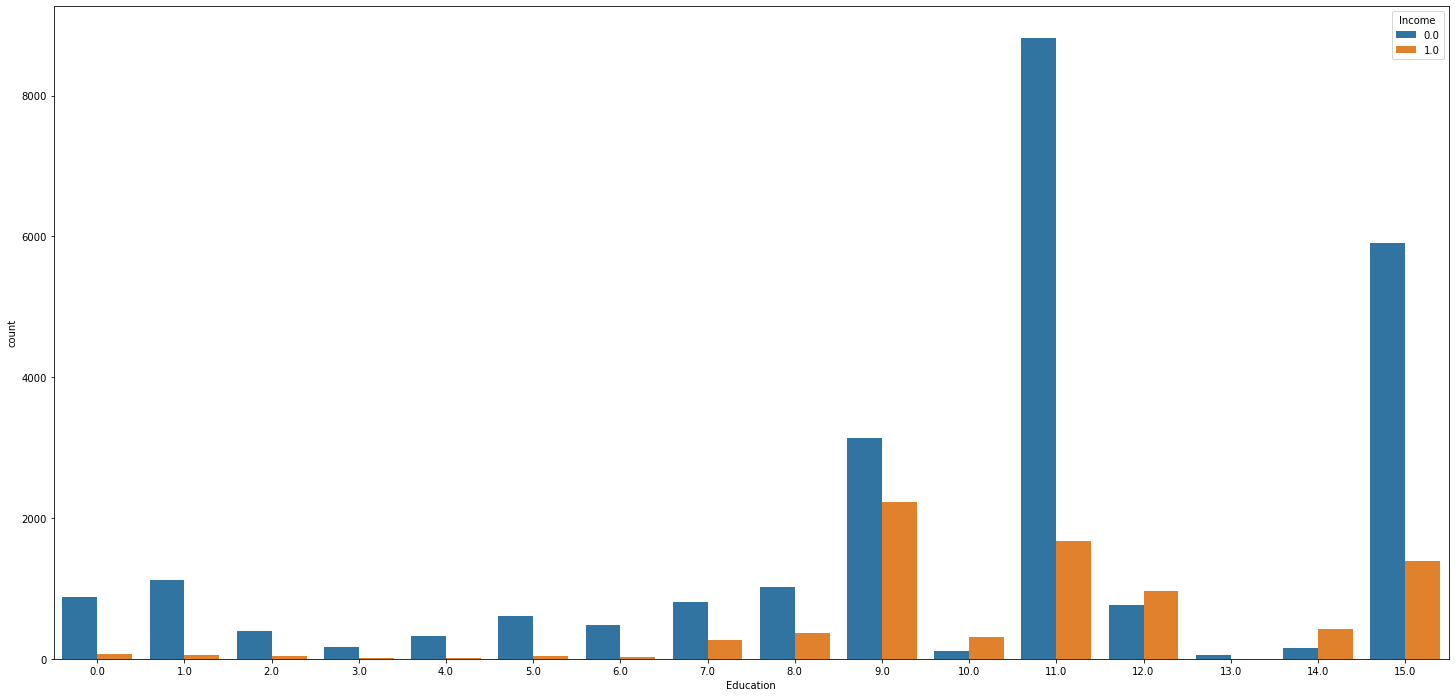

In [27]:
plt.figure(figsize =(25,12))
sns.countplot(x= 'Education', hue= 'Income', data= Df)

In every aspects, we can observe that the income is <=50k is more high. Here, we see that education also have a high impact on income.

In [30]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for column in Df.columns:
    Df[column] = Le.fit_transform(Df[column])
        
Df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [31]:
Df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

In [32]:
Df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,21.580313,3.868796,10498.253256,10.298249,9.080590,2.611794,6.572912,1.446376,3.665848,0.669195,6.500645,2.053348,39.377948,36.718796,0.240817
std,13.635711,1.455879,6048.727241,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,23.300419,10.056712,12.144192,7.823892,0.427586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,5395.750000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,10347.500000,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,15486.250000,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,72.000000,8.000000,21646.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,118.000000,91.000000,93.000000,41.000000,1.000000


# Let's start with EDA process

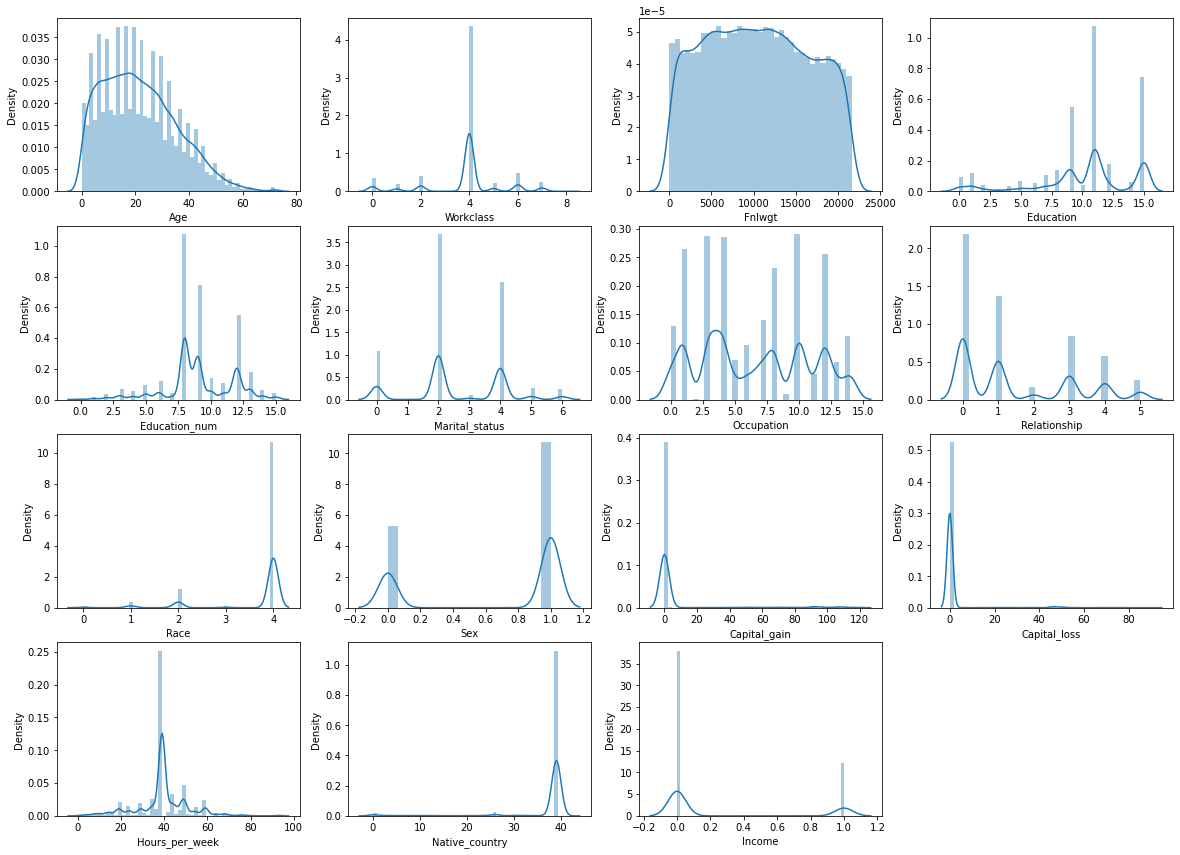

In [33]:
plt.subplots(figsize=(20, 30))
for i in enumerate(Df.columns):
    plt.subplot(8,4, i[0] + 1)
    sns.distplot(Df[i[1]])
plt.show()

# Now, let's check outliers present in the dataset

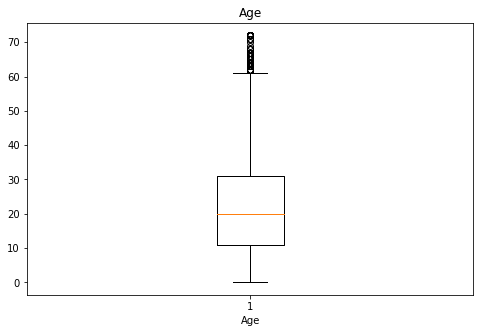

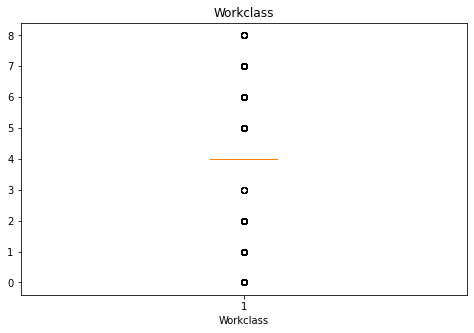

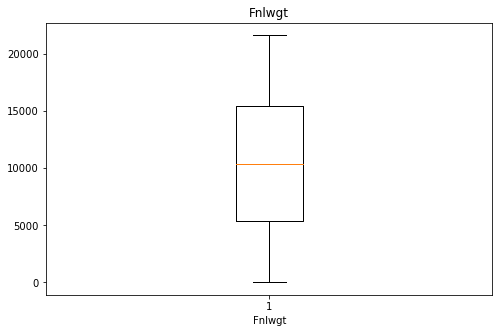

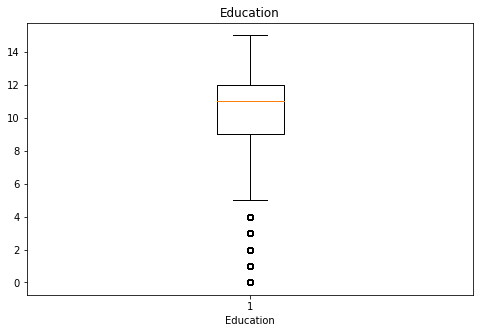

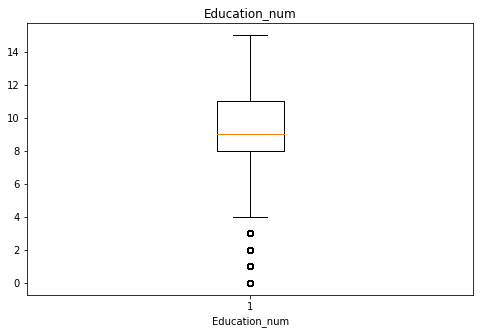

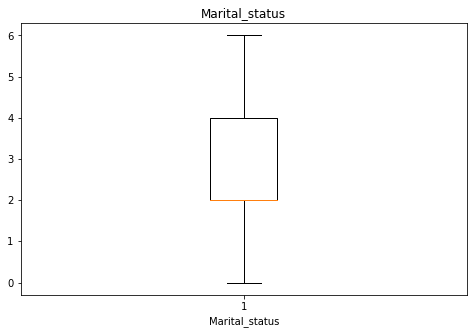

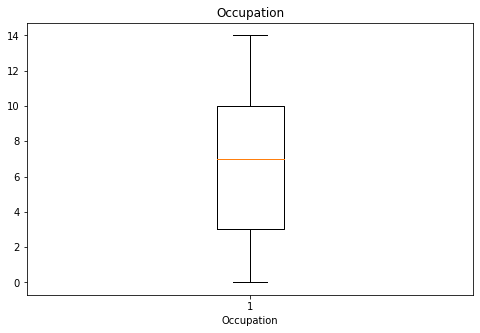

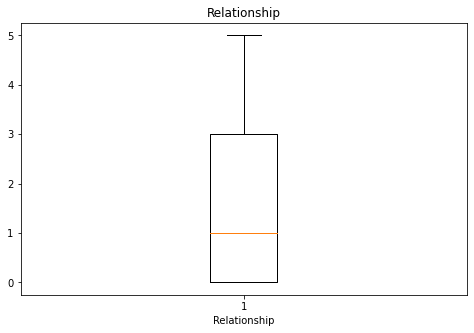

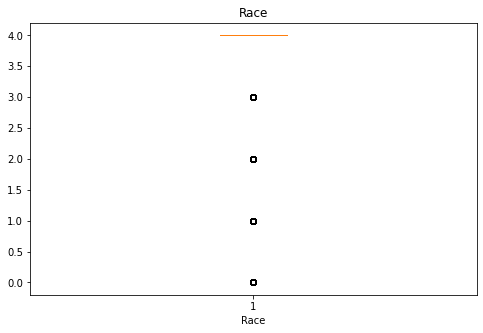

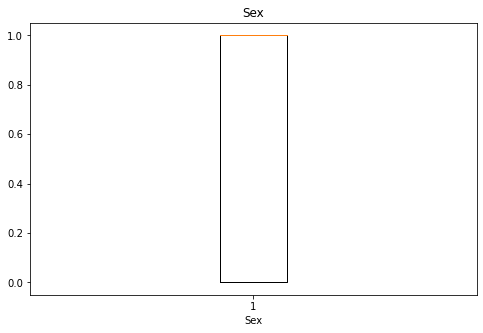

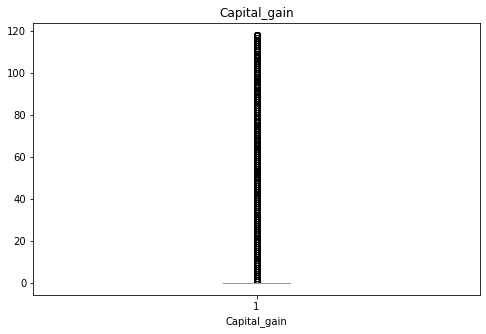

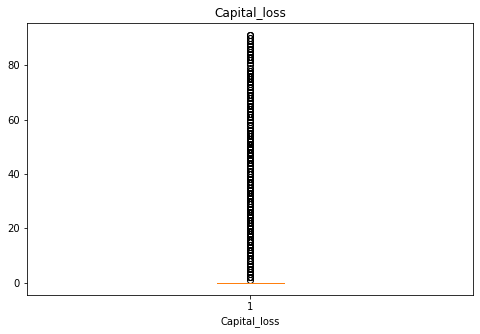

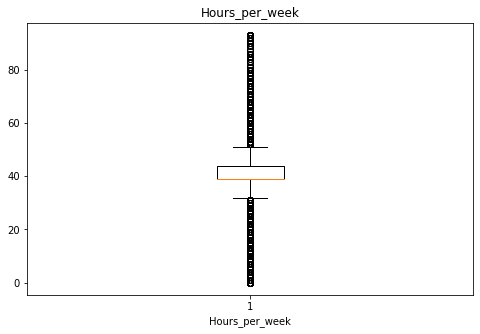

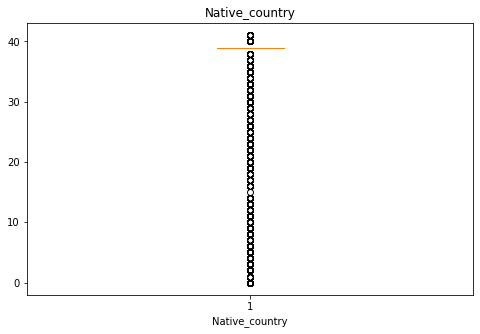

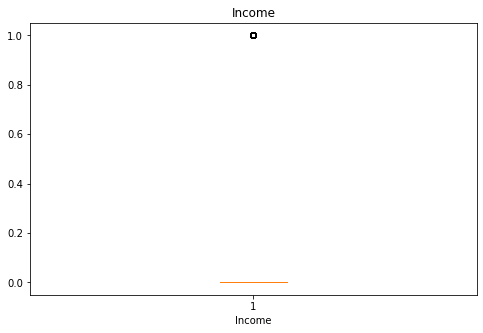

In [34]:
for j in Df.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(Df[j], vert=True)
    plt.title(j)
    plt.xlabel(j)
    plt.show()

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(Df))
threshold=3
np.where(z>3)

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64),
 array([13, 10, 10, ...,  8,  8, 10], dtype=int64))

In [36]:
new_df =Df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
5,32,4,8535,6,4,3,8,1,2,0,0,0,15,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,5,4,18559,15,9,4,11,1,4,1,0,0,39,39,0
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0


In [37]:
Df.shape

(32560, 15)

In [38]:
new_df.shape

(26735, 15)

In [39]:
dataloss=((32560-26735)/32560*100)                       # Checking of data loss in dataset after removal of outliers
dataloss

17.89004914004914

In [45]:
new_df.skew()

Age              -0.116734
Workclass         0.075043
Fnlwgt            0.042344
Education        -0.328166
Education_num    -0.150206
Marital_status   -0.086741
Occupation        0.136047
Relationship      0.709768
Race             -2.466435
Sex              -0.649131
Capital_gain      5.024051
Capital_loss      8.542437
Hours_per_week   -0.382335
Native_country    0.548532
Income            1.577615
dtype: float64

Here, we can see that the skewness present in dataset and those with more than +/-0.5 should be treated

In [48]:
from sklearn.preprocessing import power_transform

new_df[['Race','Sex','Capital_gain', 'Capital_loss','Relationship','Income']]=power_transform(new_df[['Race','Sex','Capital_gain', 'Capital_loss','Relationship','Income']],method='yeo-johnson')

In [49]:
new_df.skew()

Age              -0.116734
Workclass         0.075043
Fnlwgt            0.042344
Education        -0.328166
Education_num    -0.150206
Marital_status   -0.086741
Occupation        0.136047
Relationship      0.044852
Race             -2.466336
Sex              -0.649131
Capital_gain      5.024049
Capital_loss      8.542437
Hours_per_week   -0.382335
Native_country    0.548532
Income            1.577615
dtype: float64

Therefore, almost skewness has been removed

In [50]:
X = Df.drop("Income", axis=1)
y = Df["Income"]

In [51]:
X.shape

(32560, 14)

In [52]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()                       #Performed feature for scaling theX values
X_scaled = scaler.fit_transform(X)

In [55]:
pd.DataFrame(X).isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [56]:
new_df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,2.673500e+04,2.673500e+04,26735.000000,2.673500e+04,26735.000000,26735.000000,26735.000000,2.673500e+04,2.673500e+04,2.673500e+04,2.673500e+04,2.673500e+04,26735.000000,2.673500e+04,2.673500e+04
mean,2.955058e-17,3.026938e-16,10585.974864,-4.404867e-17,8.973667,2.637629,6.523509,2.173022e-16,2.324957e-15,-5.953802e-16,1.176106e-16,1.508341e-15,38.670095,-2.044434e-16,5.063423e-16
std,1.000019e+00,1.000019e+00,6051.187283,1.000019e+00,2.385474,1.537143,4.252288,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,11.138166,1.000019e+00,1.000019e+00
min,-2.197152e+00,-2.269271e+00,3.000000,-2.147181e+00,2.000000,0.000000,0.000000,-1.145992e+00,-2.820718e+00,-1.375894e+00,-1.917360e-01,-1.155072e-01,3.000000,-4.273620e+00,-4.848723e-01
25%,-7.203808e-01,2.204012e-02,5475.000000,-4.806267e-01,8.000000,2.000000,3.000000,-1.145992e+00,3.545197e-01,-1.375894e+00,-1.917360e-01,-1.155072e-01,39.000000,1.767400e-01,-4.848723e-01
50%,3.453709e-02,2.204012e-02,10518.000000,8.107291e-02,9.000000,2.000000,6.000000,8.854176e-02,3.545197e-01,7.268000e-01,-1.917360e-01,-1.155072e-01,39.000000,1.767400e-01,-4.848723e-01
75%,7.574163e-01,2.204012e-02,15561.500000,3.826323e-01,10.000000,4.000000,10.000000,1.050628e+00,3.545197e-01,7.268000e-01,-1.917360e-01,-1.155072e-01,44.000000,1.767400e-01,-4.848723e-01
max,2.338551e+00,3.548026e+00,21646.000000,1.364532e+00,15.000000,6.000000,14.000000,1.521727e+00,3.545197e-01,7.268000e-01,5.215504e+00,8.657465e+00,75.000000,1.891182e+01,2.062399e+00


In [57]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

0    24719
1    24719
Name: Income, dtype: int64

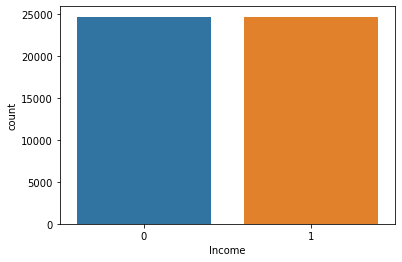

In [59]:
sns.countplot(y)
y.value_counts()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.metrics import mean_squared_error

In [61]:
LR = LogisticRegression()

In [62]:
max_accuracy = 0
max_random = 0

for i in range(0,500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    LR.fit(X_train,y_train)
    
    predict =LR.predict(X_test)
    accu = accuracy_score(y_test,predict)
    if accu>max_accuracy:
        max_accuracy=accu
        max_random = i
print("The best test acuuracy is - ", max_accuracy, "at the random state", max_random )

The best test acuuracy is -  0.7612257281553398 at the random state 279


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=279)

In [64]:
LR.fit(X_train, y_train)
predict = LR.predict(X_test)
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.7612257281553398
[[3713 1319]
 [1042 3814]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5032
           1       0.74      0.79      0.76      4856

    accuracy                           0.76      9888
   macro avg       0.76      0.76      0.76      9888
weighted avg       0.76      0.76      0.76      9888



In [65]:
from sklearn.model_selection import cross_val_score

for c in range(2,10):
    cvs=cross_val_score(LR,X,y,cv=c)
    cv_mean=cvs.mean()
    print(f'At cross fold {c} the cv score is {cv_mean}')
    print('\n')

At cross fold 2 the cv score is 0.7486953355718273


At cross fold 3 the cv score is 0.7385819190590909


At cross fold 4 the cv score is 0.737833449007065


At cross fold 5 the cv score is 0.7413732867486742


At cross fold 6 the cv score is 0.7385819663051766


At cross fold 7 the cv score is 0.7407464876749988


At cross fold 8 the cv score is 0.7372874364103073


At cross fold 9 the cv score is 0.7445291094579718




In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [68]:
DTC = DecisionTreeClassifier()

Dtc_score=cross_val_score(DTC,X,y,cv=5,scoring="accuracy")
print("Cross validation score:", np.mean(Dtc_score))

Cross validation score: 0.8504204959406995


In [69]:

DTC.fit(X_train, y_train)
predict_dt = DTC.predict(X_test)
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_dt))
print(classification_report(y_test,predict_dt))

0.8543689320388349
[[4258  774]
 [ 666 4190]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5032
           1       0.84      0.86      0.85      4856

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [70]:
print("Training accuracy is -",LR.score(X_train,y_train))
print("Testing accuracy is -",LR.score(X_test,y_test))

Training accuracy is - 0.7566877370417193
Testing accuracy is - 0.7612257281553398


In [71]:
print("Training accuracy is -",DTC.score(X_train,y_train))
print("Testing accuracy is -",DTC.score(X_test,y_test))

Training accuracy is - 0.9999747155499368
Testing accuracy is - 0.8543689320388349


In [72]:
Model = [RandomForestClassifier(), SVC(), AdaBoostClassifier()]

In [73]:
for m in Model:
    print("Accuracy of a Model   :", m)
    m.fit(X_train,y_train)
    predict_m = m.predict(X_test)
    print("Accuracy score     :", accuracy_score(y_test,predict_m))
    
    print("Confusion matrix   :", confusion_matrix(y_test,predict_m))
    
    print("Classification report    :", classification_report(y_test,predict_m))
    
    print("Training accuracy is -",m.score(X_train,y_train))
    print("Testing accuracy is -",m.score(X_test,y_test))
    
    m_score = cross_val_score(m,X,y, cv=5)
    print(m_score)
    print(m_score.mean())
    print("Diff. btw. Accuracy score and CV score is =", accuracy_score(y_test,predict_m)-m_score.mean())
    print("-----------------------------------------------------------------------------")


Accuracy of a Model   : RandomForestClassifier()
Accuracy score     : 0.8962378640776699
Confusion matrix   : [[4501  531]
 [ 495 4361]]
Classification report    :               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5032
           1       0.89      0.90      0.89      4856

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

Training accuracy is - 0.9999494310998736
Testing accuracy is - 0.8962378640776699
[0.78236246 0.8598301  0.92536408 0.93152625 0.93112167]
0.886040911163461
Diff. btw. Accuracy score and CV score is = 0.010196952914208968
-----------------------------------------------------------------------------
Accuracy of a Model   : SVC()
Accuracy score     : 0.5271035598705501
Confusion matrix   : [[2864 2168]
 [2508 2348]]
Classification report    :               precision    recall  f1-score   support

        

As per my observation, the accuracy and cv score is the closest difference in Decision Tree Classifier. So, we go with DTC for hyperparameter tuning.

# Let's do the Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 5, 10, 15,20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 'max_features': [None, 'sqrt', 'log2']}
DTC = DecisionTreeClassifier()

clf = GridSearchCV(DTC, parameter_grid, cv=5)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [77]:
clf_predict = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,clf_predict))
print("                                          ")
print(confusion_matrix(y_test,clf_predict))
print("                                          ")
print(classification_report(y_test,clf_predict))

0.8650889967637541
                                          
[[4355  677]
 [ 657 4199]]
                                          
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5032
           1       0.86      0.86      0.86      4856

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



In [79]:
Mod =DecisionTreeClassifier(criterion= 'entropy',max_depth = 15,max_features= None ,min_samples_leaf= 1 ,min_samples_split= 2)

Mod.fit(X_train,y_train)
pred =Mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

86.48867313915858


In [83]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

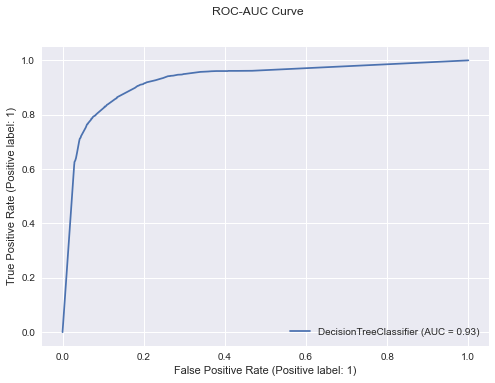

In [84]:
plt.style.use('seaborn')
ROC_AUC = metrics.plot_roc_curve(Mod, X_test, y_test)
ROC_AUC.figure_.suptitle("ROC-AUC Curve")
plt.show()

In [85]:
import joblib
joblib.dump(Mod, "Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

In [86]:
new_predict = joblib.load(open('Census_Income_Prediction.pkl','rb'))
result=new_predict.score(X_test,y_test)
print(result*100)

86.48867313915858


In [89]:
Prediction = pd.DataFrame([new_predict.predict(X_test)[:],pred[:]],index=['Predicted','Original'])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,9878,9879,9880,9881,9882,9883,9884,9885,9886,9887
Predicted,1,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,1,0,0
Original,1,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,1,0,0
